Fitness médio da população inicial: 269.1200
Fitness médio da população final: 64.0800


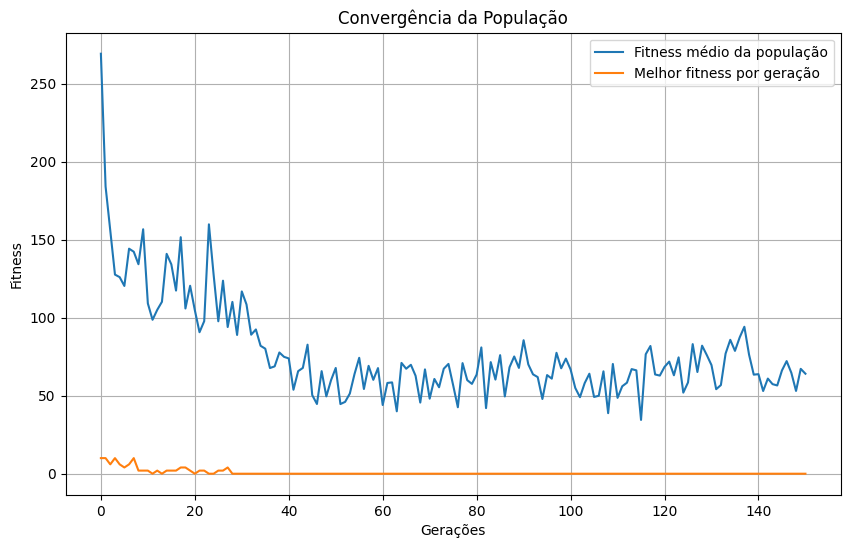

DataFrame do diretório ha30 lido com sucesso.
         Azores
0       Baghdad
1        Berlin
2        Bombay
3  Buenos Aires
4         Cairo
DataFrame do diretório ha30 lido com sucesso.
                                    #  ha30_dist.txt
0                                                  #
1    0  39  22  59  54  33  57  32  89  73  29  4...
2   39   0  20  20  81   8  49  64  63  84  10  6...
3   22  20   0  39  74  18  60  44  71  73  11  4...
4   59  20  39   0  93  27  51  81  48  80  30  6...
DataFrame do diretório uk12 lido com sucesso.
                                   #  uk12_dist.txt
0                                                 #
1     0 300 352 466 217 238 431 336 451  47 415 515
2   300   0 638 180 595 190 138 271 229 236 214 393
3   352 638   0 251  88 401 189 386 565 206 292 349
4   466 180 251   0 139 371 169 316 180 284 206 198
DataFrame do diretório uk12 lido com sucesso.
  #  uk12_name.txt
0                #
1      Aberystwyth
2         Brighton
3        Edinb

In [3]:
import os
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt

def fitness(individual, numbers):
    sum_A = sum(numbers[i] for i in range(len(individual)) if individual[i] == 1)
    sum_B = sum(numbers[i] for i in range(len(individual)) if individual[i] == 0)
    return abs(sum_A - sum_B)

def tournament_selection(population, fitness_values, k=3):
    selected = random.sample(range(len(population)), k)
    selected_fitness = [fitness_values[i] for i in selected]
    winner = selected[np.argmin(selected_fitness)]
    return population[winner]

def crossover(parent1, parent2, crossover_prob=0.9):
    if random.random() < crossover_prob:
        point = random.randint(1, len(parent1) - 1)
        child1 = np.concatenate([parent1[:point], parent2[point:]])
        child2 = np.concatenate([parent2[:point], parent1[point:]])
        return child1, child2
    return parent1.copy(), parent2.copy()

def mutate(individual, mutation_prob=0.02):
    for i in range(len(individual)):
        if random.random() < mutation_prob:
            individual[i] = 1 - individual[i]
    return individual

def initialize_population(pop_size, n):
    return [np.random.randint(0, 2, size=n) for _ in range(pop_size)]

def genetic_algorithm(numbers, pop_size=50, generations=150, crossover_prob=0.9, mutation_prob=0.02):
    n = len(numbers)
    population = initialize_population(pop_size, n)
    fitness_history = []
    best_fitness_history = []

    fitness_values = [fitness(individual, numbers) for individual in population]
    fitness_history.append(np.mean(fitness_values))
    best_fitness_history.append(min(fitness_values))

    for generation in range(generations):
        new_population = []

        while len(new_population) < pop_size:
            parent1 = tournament_selection(population, fitness_values)
            parent2 = tournament_selection(population, fitness_values)

            child1, child2 = crossover(parent1, parent2, crossover_prob)

            child1 = mutate(child1, mutation_prob)
            child2 = mutate(child2, mutation_prob)

            new_population.append(child1)
            new_population.append(child2)

        population = new_population[:pop_size]

        fitness_values = [fitness(individual, numbers) for individual in population]
        fitness_history.append(np.mean(fitness_values))
        best_fitness_history.append(min(fitness_values))

    return fitness_history, best_fitness_history

def plot_results(fitness_history, best_fitness_history):
    plt.figure(figsize=(10, 6))
    plt.plot(fitness_history, label='Fitness médio da população')
    plt.plot(best_fitness_history, label='Melhor fitness por geração')
    plt.title('Convergência da População')
    plt.xlabel('Gerações')
    plt.ylabel('Fitness')
    plt.legend()
    plt.grid(True)
    plt.show()

N = 30
numbers = np.random.randint(1, 100, size=N)

fitness_history, best_fitness_history = genetic_algorithm(numbers)

print(f"Fitness médio da população inicial: {fitness_history[0]:.4f}")
print(f"Fitness médio da população final: {fitness_history[-1]:.4f}")

plot_results(fitness_history, best_fitness_history)


def read_files_from_directory(directory, prefix):
    """
    Lê arquivos de um diretório específico com um prefixo definido.
    Retorna uma lista de DataFrames contendo os dados dos arquivos.
    """
    files = [f for f in os.listdir(directory) if f.startswith(prefix)]
    dataframes = []

    for file in files:
        file_path = os.path.join(directory, file)
        df = pd.read_csv(file_path)
        dataframes.append(df)

    return dataframes

def process_datasets():
    ha30_directory = 'ha30/'  
    uk12_directory = 'uk12/'  

    ha30_dfs = read_files_from_directory(ha30_directory, 'ha30_')

    uk12_dfs = read_files_from_directory(uk12_directory, 'uk12_')

    for df in ha30_dfs:
        if df.empty:
            print("DataFrame do diretório ha30 está vazio.")
        else:
            print("DataFrame do diretório ha30 lido com sucesso.")
            print(df.head())

    for df in uk12_dfs:
        if df.empty:
            print("DataFrame do diretório uk12 está vazio.")
        else:
            print("DataFrame do diretório uk12 lido com sucesso.")
            print(df.head())

process_datasets()
